In [3]:
"""
This program inferes the probability of heads in a coin tossing 
experiment. Arguments are iterations, number of heads, total 
number of trials, delta for prior.
"""

#import external modules 
%matplotlib inline 
import sys
import random
import math 
import matplotlib.pyplot as plt 

In [4]:
def logbeta(a, b):
    return math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)

In [5]:
def prior(x, a, b):
    return math.log(x) * (a - 1.0) + math.log(1.0 - x) * (b - 1.0) - logbeta(a, b)

In [15]:
def proposal(theta, delta):
    """
    Delivers a value from a window around the old theta value, the window size 
    """
    
    lower = theta - delta
    upper = theta + delta
    
    #if 0.0 iis a then this is lower = 2a - lower
    if lower < 0.0:
        lower -= lower
    if upper > 1.0:
        upper = 2.0 - upper
        
    newtheta = random.uniform(lower, upper)
    #print("prop", newtheta)
    
    return newtheta

In [16]:
def likelihood(theta, heads, total):
    return math.log(theta) * heads + math.log(1.0 - theta) * (total - heads)

In [17]:
def compare(likenew, likeold, priornew, priorold):
    r = math.log(random.uniform(0.0, 1.0))
    a = likenew - likeold
    x = r < a
    #print(a)
    return x 

In [18]:
def mcmc(iter, delta, heads, total):
    results = []
    thetaold = 0.5 
    likeold = -1000000000.0
    i = 0
    while(i < iter):
        i += 1 
        theta = proposal(thetaold, delta)
        likenew = prior(theta, 1, 1) + likelihood(theta, heads, total)
        #print(likenew, likeold)
        if(compare(likenew, likeold, 1.0, 1.0)):
            results.append(theta)
            thetaold = theta
            likeold = likenew
        else:
            results.append(thetaold)
    return results

In [21]:
def run(iterations, delta, heads, total):
    results = mcmc(iterations, delta, heads, total)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    n, bins, patches = ax.hist(results, 50, density=True, facecolor='green', alpha=0.75)
    ax.set_xlim(0, 1)
    ax.grid(True)
    ax.set_xlabel('Probability of heads')
    ax.set_ylabel('Posterior')

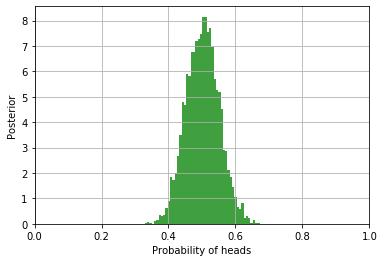

In [22]:
run(10000, 0.1, 50, 100)